# Image Compression

In [1]:
from PIL import Image
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
gaussimg = Image.open(r"data/gauss.jpg")
gaussimg = gaussimg.resize((1024,1024))

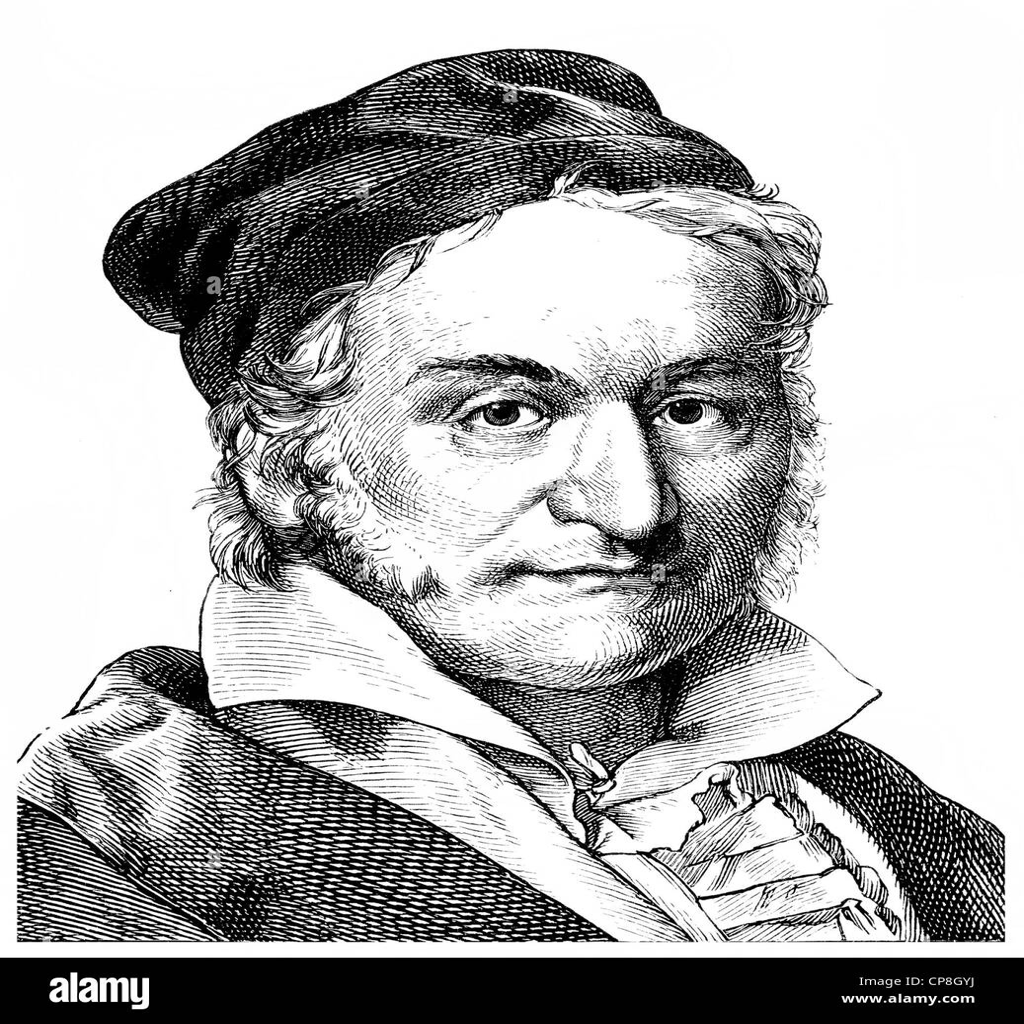

In [3]:
grayscale = gaussimg.convert("L")
mat = np.array(grayscale)
grayscale

In [6]:
U, S, VT = np.linalg.svd(grayscale)

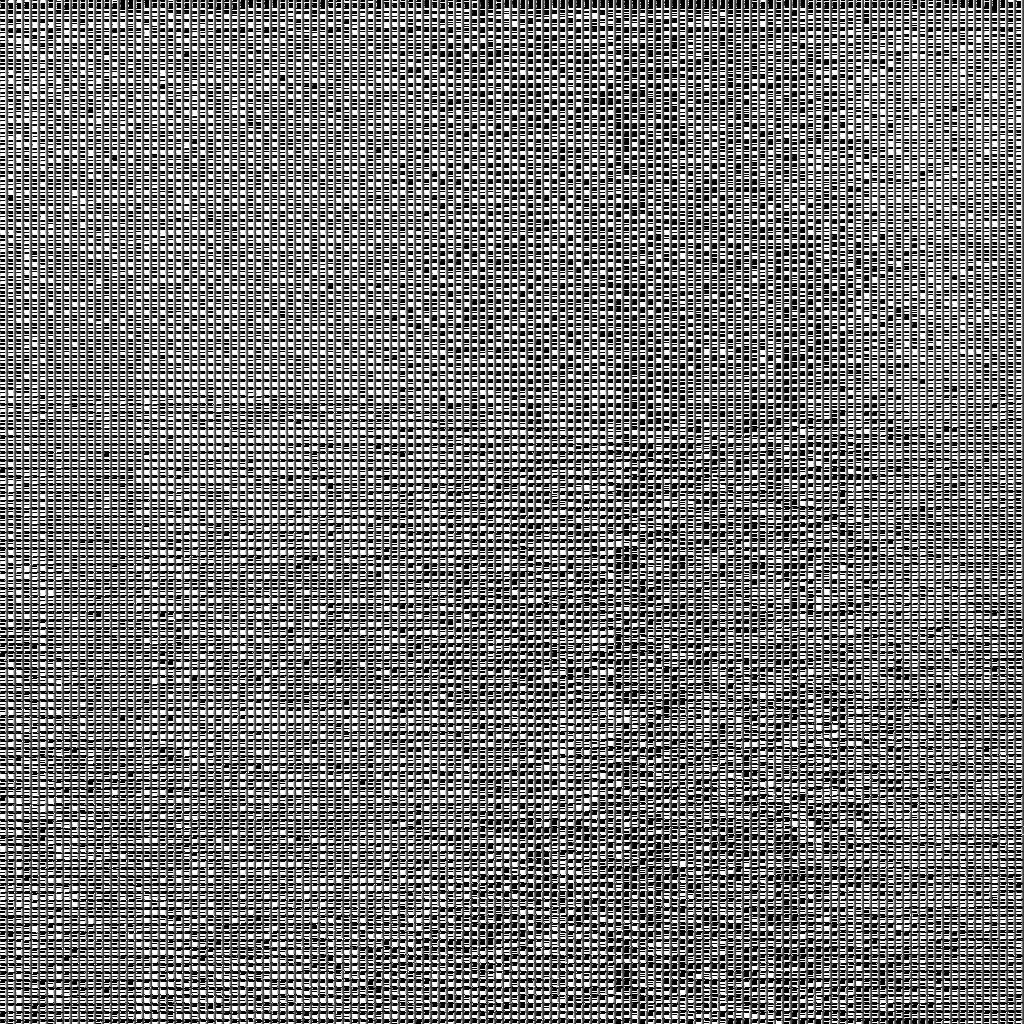

In [7]:
mat = U @ np.diag(S) @ VT
recon_image = Image.fromarray(mat, mode="L")
recon_image

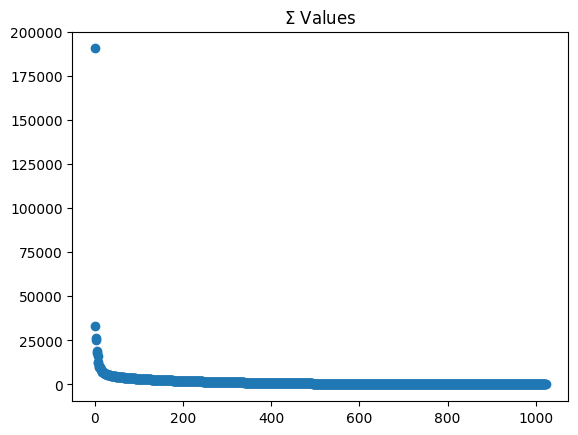

In [41]:
x = range(1024)
y = S

plt.title("$\Sigma$ Values")

plt.scatter(x, y)
plt.show()

In [42]:
threshold = 1200
idx = 0
for i in range(len(S)):
    if S[i] < threshold:
        idx = i
        break
x1 = range(0, idx)
x2 = range(idx, 1024)
y1 = S[:idx]
y2 = S[idx:]

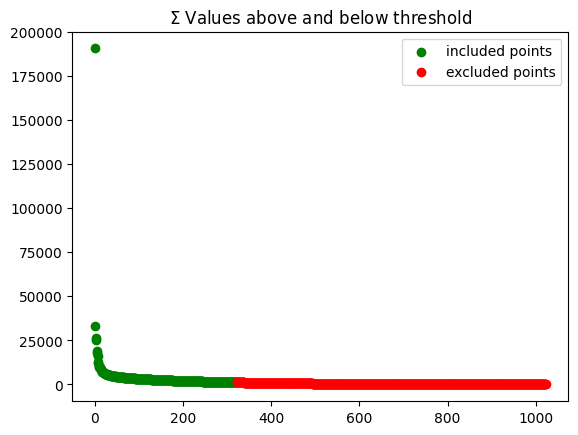

In [43]:
plt.title("$\Sigma$ Values above and below threshold")

plt.scatter(x1, y1, color='green', label='included points')
plt.scatter(x2, y2, color='red', label='excluded points')
plt.legend()
plt.show()

In [44]:
S_red = np.concatenate((y1,np.zeros(len(y2))))
U2 = U[:idx,:]
VT2 = VT[:, :idx]

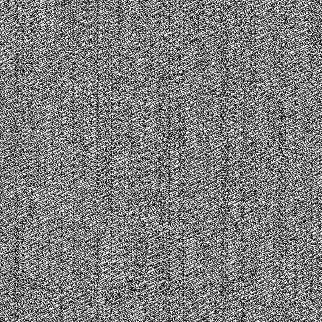

In [45]:
new_mat = U2 @ np.diag(S_red) @ VT2
new_image = Image.fromarray(new_mat, mode="L")
new_image

In [46]:
def frob(A, B):
    sum = 0.0
    for i in range(len(A)):
        for j in range(len(A[0])):
            sum += (A[i][j] - B[i][j]) ** 2
    return np.sqrt(sum)

In [47]:
error = frob(new_mat, mat)
error

np.float64(3383.6918580518914)

In [73]:
def recon_error(num_nonzero):
    orig = np.array(grayscale)
    U1, S1, VT1 = np.linalg.svd(orig)
    S_dropped = np.zeros(1024)
    S_dropped[:num_nonzero] = S1[:num_nonzero]
    recon_matrix = U1 @ np.diag(S_dropped) @ VT1
    print("Done: " + str(num_nonzero))
    return (frob(recon_matrix, orig), recon_matrix)

In [74]:
x2 = range(1, 1024, 200)
yi2 = [recon_error(e) for e in x2]
y2, i2 = (map(list, zip(*yi2)))

Done: 1
Done: 201
Done: 401
Done: 601
Done: 801
Done: 1001


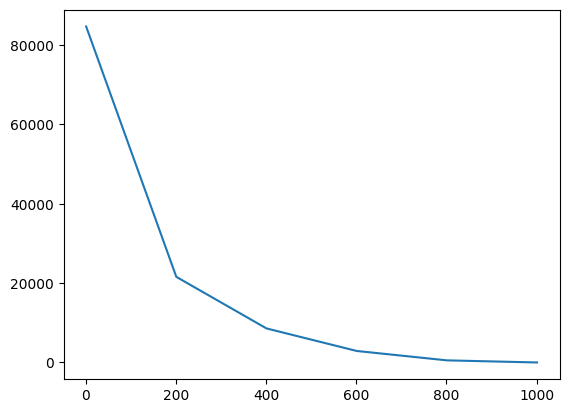

In [75]:
plt.plot(x2, y2)

np.float64(1.1604640681376215e-09)